## =============Modeling nhóm 7==================

##### MODEL DỰ ĐOÁN LƯỢNG NĂNG LƯỢNG TIÊU THỤ CỦA NĂNG LƯỢNG GIÓ VÀO NHỮNG LOẠI NĂNG LƯỢNG KHÁC

In [1]:
#import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### 1. Đọc dữ liệu và vẽ biểu đồ tìm kiếm sự tương quan giữa các cột

In [2]:
#Đọc dataframe
df = pd.read_csv('../Data/data_processed.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (1817, 10)


,Country,Year,Fossil fuels (TWh),Coal (TWh),Oil (TWh),Gas (TWh),Renewables (TWh),Hydropower (TWh),Solar (TWh),Wind (TWh)
0,Algeria,2000,300.0,5.64,103.13,191.01,0.0,0.0,0.0,0.0
1,Argentina,2000,595.0,7.51,264.94,322.97,86.0,84.0,0.0,0.0
2,Australia,2000,1253.0,591.66,455.98,205.55,52.0,49.0,0.0,0.0
3,Austria,2000,262.0,42.47,141.75,78.21,129.0,124.0,0.0,0.0
4,Azerbaijan,2000,128.0,0.00,74.69,52.83,5.0,5.0,0.0,0.0


In [3]:
#Bỏ những cột không cần thiết cho việc huấn luyện model
df = df.drop(['Country', 'Year', 'Fossil fuels (TWh)', 'Renewables (TWh)'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Coal (TWh)        1817 non-null   float64
 1   Oil (TWh)         1817 non-null   float64
 2   Gas (TWh)         1817 non-null   float64
 3   Hydropower (TWh)  1817 non-null   float64
 4   Solar (TWh)       1817 non-null   float64
 5   Wind (TWh)        1817 non-null   float64
dtypes: float64(6)
memory usage: 85.3 KB


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


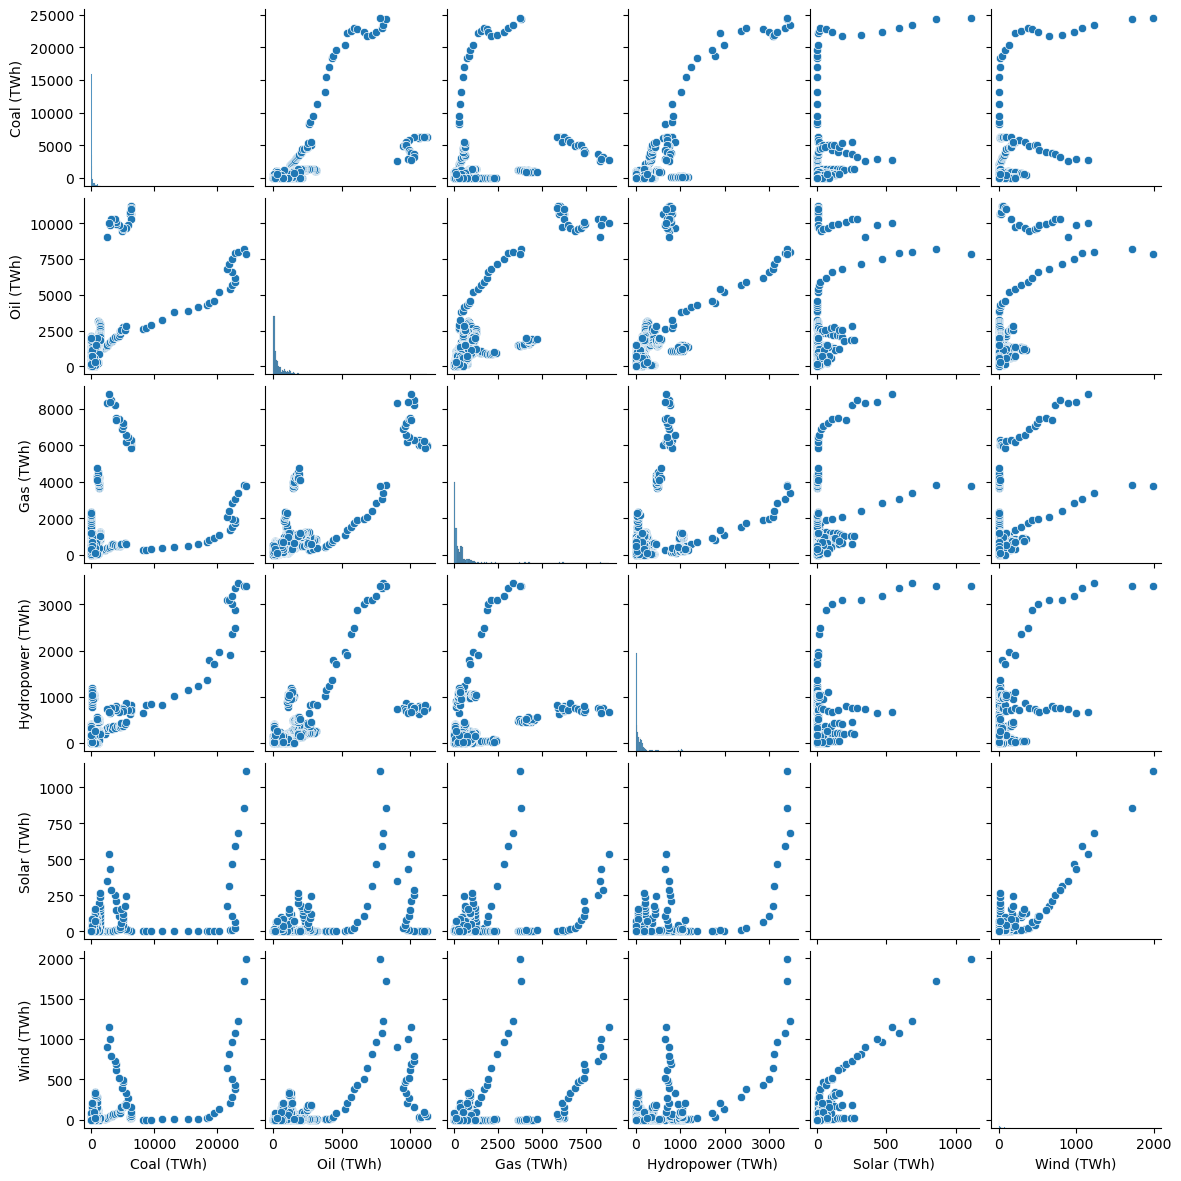

In [4]:
#Vẽ biểu đồ tìm kiếm sự tương quan giữa các cặp trong biểu đồ
sns.pairplot(data = df, height = 2)  

Ma trận tương quan giữa các biến độc lập: 
                   Coal (TWh)  Oil (TWh)  Gas (TWh)  Hydropower (TWh)  \
Coal (TWh)          1.000000   0.649910   0.369434          0.817324   
Oil (TWh)           0.649910   1.000000   0.850027          0.634423   
Gas (TWh)           0.369434   0.850027   1.000000          0.442360   
Hydropower (TWh)    0.817324   0.634423   0.442360          1.000000   
Solar (TWh)         0.542844   0.492258   0.398723          0.553612   
Wind (TWh)          0.628991   0.639290   0.535078          0.650757   

                  Solar (TWh)  Wind (TWh)  
Coal (TWh)           0.542844    0.628991  
Oil (TWh)            0.492258    0.639290  
Gas (TWh)            0.398723    0.535078  
Hydropower (TWh)     0.553612    0.650757  
Solar (TWh)          1.000000    0.909361  
Wind (TWh)           0.909361    1.000000  


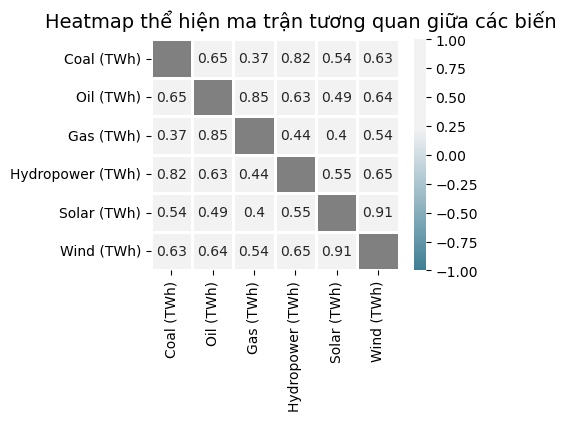

In [5]:
#Vẽ biểu đồ heatmap để thấy được sự tương quan rõ ràng hơn
feature = df.columns
corr = df[feature].corr()  
print('Ma trận tương quan giữa các biến độc lập: \n', corr)  
  
# Tạo một ma trận zeros có cùng kích thước và kiểu dữ liệu như ma trận tương quan corr.  
masking = np.zeros_like(corr, dtype=np.bool_)
# Đặt các phần tử trên đường chéo chính của ma trận masking thành True. Điều này sẽ "che" các ô trên đường chéo vì chúng thường có giá trị 1 (tương quan của một biến với chính nó là 1).
np.fill_diagonal(masking, val = True)  

#  Tạo một subplot với kích thước 4x3 để vẽ biểu đồ heatmap.
figure, axis = plt.subplots(figsize = (4, 3))  
  
# màu sẽ chuyển từ một màu có mã màu 223 đến một màu có mã màu 14.
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
# Đặt màu cho các ô dữ liệu bị thiếu (nếu có) thành màu xám.
c_map.set_bad('grey')  
  
# Vẽ biểu đồ heatmap 
sns.heatmap(corr, annot = True, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap thể hiện ma trận tương quan giữa các biến', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  

##### 2. Modeling
    - Lấy bộ dữ liệu để train và test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
feature_cols = ['Coal (TWh)', 'Oil (TWh)', 'Gas (TWh)', 'Hydropower (TWh)', 'Solar (TWh)']

X = df[feature_cols]
Y = df['Wind (TWh)']

# Tham số test_size là để lấy bộ test chiếm 20% và random_state là trạng thái random không thay đổi tức là qua những lần chạy khác nhau thì bộ dữ liệu tương đồng nhau.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.head()

,Coal (TWh),Oil (TWh),Gas (TWh),Hydropower (TWh),Solar (TWh)
292,106.62,111.21,171.30,38.0,0.0
1417,114.23,882.49,785.49,16.0,30.0
1548,9.07,109.58,45.75,330.0,0.0
300,234.10,885.72,248.29,119.0,0.0
1704,18.39,83.84,38.74,63.0,1.0


    a. Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Tạo model
lr = LinearRegression()

# Train 
lr.fit(X_train, Y_train)

# Dự đoán kết quả dựa trên tập X_test
Y_pred = lr.predict(X_test)

# Tính MSE
mse = mean_squared_error(Y_test, Y_pred)

# Tính R_square
r2 = r2_score(Y_test, Y_pred)

print('MSE=',mse,'\nR_square=', r2)

# Tạo DataFrame từ Y_test và Y_pred để dễ so sánh
df_compare = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
print(df_compare)


MSE= 1056.1278408552885 
R_square= 0.934208106932717
      Y_test     Y_pred
1507     0.0  -2.818911
680      0.0   0.191050
135      0.0  71.409796
408      0.0  -0.435401
591      0.0  -5.358055
...      ...        ...
534      0.0  -5.254379
710      0.0  -1.164378
432      0.0   0.565201
1105     0.0   2.358255
170      2.0  66.527206

[364 rows x 2 columns]


In [10]:
#Tinh chỉnh mô hình LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Tạo bậc huấn luyện bây giờ là 2, không còn là 1 như trước là chỉ có một thuộc tính
#Ví dụ có 3 biến a,b,c thì sẽ tạo ra các phương trình nhiều biến gồm a^2,b^2,c^2, ab,ac,bc. kiểu vậy
degree = 2

# Tạo pipeline để huấn luyện cho mô hình
model = make_pipeline(PolynomialFeatures(degree), lr)

# Train model
model.fit(X_train, Y_train)

# TÍnh dự đoán
Y_pred = model.predict(X_test)

#Tính MSE
mse = mean_squared_error(Y_test, Y_pred)


print('MSE=',mse,'\nR_square=', r2)

# Tạo DataFrame từ Y_test và Y_pred để dễ so sánh
df_compare = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
print(df_compare)


MSE= 1483.0822930239112 
R_square= 0.934208106932717
      Y_test    Y_pred
1507     0.0  1.219870
680      0.0  1.817126
135      0.0  8.345086
408      0.0  3.805410
591      0.0  1.292589
...      ...       ...
534      0.0  1.595004
710      0.0  4.337086
432      0.0  4.574686
1105     0.0  5.817546
170      2.0 -4.767800

[364 rows x 2 columns]


- Sau khi tinh chỉnh thì ta thấy MSE tăng lên cho thấy quá trình tinh chỉnh không hiệu quả hoặc nó bị overfitting chỉ cho kết quả tốt trên tập train và không tốt trên tập test.
- Vì vậy cho thấy ở Model Linear Regression này thì degree=1 vẫn cho kết quả tốt nhất.

    b. Decision Tree Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
#Tạo model
regressor = DecisionTreeRegressor(random_state= 42)

# Train 
regressor.fit(X_train, Y_train)

# dự đoán trên tập test
Y_pred = regressor.predict(X_test)

# Tính mse
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(Y_test, Y_pred)

print('MSE=',mse,'\nR_square=', r2)

# Tạo DataFrame từ Y_test và Y_pred để dễ so sánh
df_compare = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
print(df_compare)

MSE= 563.4862637362637 
R_square= 0.9648974048647404
      Y_test  Y_pred
1507     0.0     0.0
680      0.0     0.0
135      0.0     0.0
408      0.0     0.0
591      0.0     0.0
...      ...     ...
534      0.0     0.0
710      0.0     0.0
432      0.0     0.0
1105     0.0    27.0
170      2.0     2.0

[364 rows x 2 columns]


    c. Gradient Boosting Regressor

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
#Tạo model
gb = GradientBoostingRegressor()

# Train 
gb.fit(X_train, Y_train)

# Dự đoán kết quả dựa trên tập X_test
Y_pred = gb.predict(X_test)

# Tính MSE
mse = mean_squared_error(Y_test, Y_pred)

# Tính R_square
r2 = r2_score(Y_test, Y_pred)

print('MSE=',mse,'\nR_square=', r2)

# Tạo DataFrame từ Y_test và Y_pred để dễ so sánh
df_compare = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
print(df_compare)

MSE= 570.6845780173954 
R_square= 0.9644489830874436
      Y_test     Y_pred
1507     0.0   2.472806
680      0.0  -0.214782
135      0.0  -0.532727
408      0.0   2.011190
591      0.0   0.628268
...      ...        ...
534      0.0   1.985982
710      0.0   0.708449
432      0.0  -0.371915
1105     0.0   2.465445
170      2.0  11.921588

[364 rows x 2 columns]


In [15]:
#Tinh chỉnh mô hình Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [16]:
gb_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [500, 1000, 5000]}

In [17]:
gb_gs_best = GridSearchCV(gb,
                        gb_params,
                        cv=5,
                        n_jobs=-1,
                        verbose=True).fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [18]:
gb_final = gb.set_params(**gb_gs_best.best_params_).fit(X_train, Y_train)

In [19]:
gb_final.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
# Dự đoán kết quả dựa trên tập X_test
Y_pred = gb_final.predict(X_test)

# Tính MSE
mse = mean_squared_error(Y_test, Y_pred)

# Tính R_square
r2 = r2_score(Y_test, Y_pred)

print('MSE=',mse,'\nR_square=', r2)

MSE= 476.9601233514569 
R_square= 0.9702875843065699


##### 3. Cross validation

In [21]:
from sklearn.model_selection import cross_val_score

    a. Stratified K-Fold

In [22]:
from sklearn.model_selection import StratifiedKFold

sk_folds = StratifiedKFold(n_splits = 5)

        - Linear Regression

In [23]:
scores = cross_val_score(lr, X, Y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.77700317 0.89129876 0.86153927 0.89553244 0.85393473]
Average CV Score:  0.8558616717429214
Number of CV Scores used in Average:  5


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


        - Decision Tree Regression

In [24]:
scores = cross_val_score(regressor, X, Y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Scores:  [0.9292814  0.91536164 0.95051094 0.94980399 0.73724422]
Average CV Score:  0.8964404372753991
Number of CV Scores used in Average:  5


        - Gradient Boosting Regressor

In [25]:
scores = cross_val_score(gb_final, X, Y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Scores:  [0.87266065 0.93863383 0.97980362 0.96311491 0.9410486 ]
Average CV Score:  0.9390523213270063
Number of CV Scores used in Average:  5


    b. Shuffle Split

In [26]:
# import thư viện
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(train_size=0.7, test_size=0.2, n_splits = 5)

        - Linear Regression

In [27]:
scores = cross_val_score(lr, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96622181 0.90346734 0.87161311 0.82411226 0.67306787]
Average CV Score:  0.84769647720733
Number of CV Scores used in Average:  5


        - Decision Tree Regression

In [28]:
scores = cross_val_score(regressor, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96116336 0.93686361 0.74458178 0.84680838 0.84001396]
Average CV Score:  0.8658862170712022
Number of CV Scores used in Average:  5


        - Gradient Boosting Regressor

In [29]:
scores = cross_val_score(gb_final, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.97801855 0.91367857 0.95483254 0.96834267 0.91049259]
Average CV Score:  0.9450729849239214
Number of CV Scores used in Average:  5


##### 4. Nhận xét

    Ưu, nhược điểm của các mô hình:
        - Linear Regression và Decision Tree Regression có thời gian phản hôì nhanh. Tuy nhiên, MSE khá lớn
        - Gradient Boosting Regressor có thời gian phản hồi lâu hơn nhiều. Tuy nhiên, nó giảm thiểu được MSE

    Dựa vào MSE và R^2, cùng với Cross Validation Score ta nhận thấy: 
        - Trong bộ dữ liệu này việc sử dụng thuật toán Linear Regression và Decision Tree Regression là chưa thực sự không hiệu quả.
        - Như vậy chúng ta có thể sử dụng Gradient Boosting Regressor sau một số hiệu chỉnh là hiệu quả nhất trong 3 phương án này. Tuy nhiêu khi đánh giá về độ hiệu quả trên tập dữ liệu này là chưa cao. 